In dit programma :
-inlezen
-horizontaal flippen
-vertikaal flippen
-horizontaal + vertikaal flippen
-kleuren r g b
-kleuren r g b met wit
-vergroten

In [2]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

In [3]:
foto1 = Image.open("python.jpg")

In [4]:
foto1.show()

In [5]:
print(foto1.height, foto1.width)


148 148


In [6]:
#functie om beeld om te zetten naar matrix 
def imagetomatrix (file) :
    image = Image.open(file)
    imagematrix = np.asarray(image)
    return imagematrix   


(148, 148, 3)


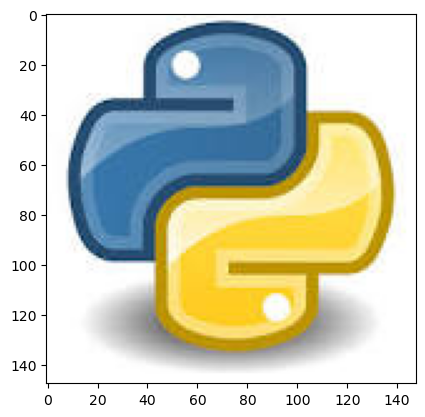

In [7]:
im_pylogo = imagetomatrix("python.jpg") 
print(im_pylogo.shape)
plt.imshow(im_pylogo)


In [ ]:
#functie om (image)matrix horizontaal te spiegelen 
def fliphor (matrix) :
    r = matrix.shape[0]
    k = matrix.shape[1]
    #print(r,k)
    matrix_fliphor = np.zeros(shape = (r,k,3), dtype=np.int32)
    for i in range(r) :
        for j in range(k) :
            matrix_fliphor[i,j] = matrix[i,(r-1-j)%r]        
    return matrix_fliphor

#functie om (image)matrix vertikaal te spiegelen 
def flipver (matrix) :
    r = matrix.shape[0]
    k = matrix.shape[1]
    #print(r,k)
    matrix_flipver = np.zeros(shape = (r,k,3), dtype=np.int32)
    for i in range(r) :
        for j in range(k) :
            matrix_flipver[i,j] = matrix[(k-1-i)%k,j]  
    return matrix_flipver

#functie om (image)matrix horizontaal en vertikaal te spiegelen 
def fliphorver (matrix) :
    r = matrix.shape[0]
    k = matrix.shape[1]
    #print(r,k)
    matrix_fliphorver = np.zeros(shape = (r,k,3), dtype=np.int32)
    matrix_fliphorver = flipver(fliphor(matrix))
    return matrix_fliphorver


In [ ]:
im_pylogo_h = fliphor (im_pylogo)
plt.imshow(im_pylogo_h)

In [ ]:
im_pylogo_v = flipver (im_pylogo)
plt.imshow(im_pylogo_v)

In [ ]:
im_pylogo_hv = fliphorver (im_pylogo)
plt.imshow(im_pylogo_hv)

In [ ]:
#functie om 1 kleur van imagematric (rgb) te bewaren 
def keepcolor (matrix,color) :
    matrix_color = matrix.copy()
    if color == 0 : #keep red postitie 0:
        matrix_color[:,:,[1,2]] = 0
    elif color == 1 : #keep green postitie 1:
        matrix_color[:,:,[0,2]] = 0
    elif color == 2 : #keep blue postitie 2:
        matrix_color[:,:,[0,1]] = 0
    return matrix_color


In [ ]:
im_pylogo_red = keepcolor (im_pylogo,0)
plt.imshow(im_pylogo_red)

In [ ]:
im_pylogo_green = keepcolor (im_pylogo,1)
plt.imshow(im_pylogo_green)

In [ ]:
im_pylogo_blue = keepcolor (im_pylogo,2)
plt.imshow(im_pylogo_blue)

In [ ]:
#functie om white (255,255,255) + 1 kleur van imagematric (rgb) te bewaren 
def keepcolor_w (matrix,color) :
    matrix_color = matrix.copy()
    for i in range(matrix.shape[0]) :
        for j in range(matrix.shape[1]) :
            if not (matrix_color[i,j,0] == 255 and matrix_color[i,j,1] == 255 and matrix_color[i,j,2] == 255) :
                if color == 0 : #keep red postitie 0:
                    matrix_color[i,j,[1,2]] = 0
                elif color == 1 : #keep green postitie 1:
                    matrix_color[i,j,[0,2]] = 0
                elif color == 2 : #keep blue postitie 2:
                    matrix_color[i,j,[0,1]] = 0
    return matrix_color


In [ ]:
im_pylogo_redw = keepcolor_w (im_pylogo,0)
plt.imshow(im_pylogo_redw)

In [ ]:
im_pylogo_greenw = keepcolor_w (im_pylogo,1)
plt.imshow(im_pylogo_greenw)

In [ ]:
im_pylogo_bluew = keepcolor_w (im_pylogo,2)
plt.imshow(im_pylogo_bluew)

In [ ]:
#functie om (image)matrix een factor te vergroten 
def larger (matrix,f) :
    r = matrix.shape[0]
    k = matrix.shape[1]
    matrix_larger = np.zeros(shape = (r*f,k*f,3), dtype=np.int32)
    for i in range(matrix_larger.shape[0]) :
        for j in range(matrix_larger.shape[1]) :
            matrix_larger[i,j] = matrix[i//f,j//f]
    return matrix_larger


In [ ]:
im_pylogo_f2 = larger (im_pylogo,2)
plt.imshow(im_pylogo_f2)


In [ ]:
im_pylogo_f6 = larger (im_pylogo,6)
plt.imshow(im_pylogo_f6)


In [ ]:
#functie om (image)matrix horizontaal te herhalen 
def repeat_k (matrix,fk) : #k >= 2
    pict = matrix.copy()
    for j in range(1,fk) :
        pict = np.concatenate([pict, matrix], axis = 1)
    return pict 

#functie om (image)matrix horizontaal te herhalen 
def repeat_r (matrix,fr) : #r >= 2
    pict = matrix.copy()
    for i in range(1,fr) :
        pict = np.concatenate([pict, matrix], axis = 0)
    return pict        
                               

In [ ]:
im_pylogo_k6 = repeat_k (im_pylogo,6)
plt.imshow(im_pylogo_k6)

In [ ]:
im_pylogo_r4 = repeat_r (im_pylogo,4)
plt.imshow(im_pylogo_r4)

In [ ]:
im_pylogo_k8r3 = repeat_k (repeat_r (im_pylogo,3),8)
plt.imshow(im_pylogo_k8r3)

In [ ]:
pict1 = repeat_k (np.concatenate([im_pylogo, im_pylogo_h, im_pylogo_v, im_pylogo_hv], axis = 0),6)
plt.imshow(pict1)

In [ ]:
pict2a = repeat_k (im_pylogo_bluew, 4)
plt.imshow(pict2a)


In [ ]:
pict2c = repeat_k (im_pylogo_greenw, 4)
plt.imshow(pict2c)

In [ ]:
pict2b = np.concatenate([repeat_r (im_pylogo_redw, 2), larger (im_pylogo, 2), repeat_r (im_pylogo_redw, 2)], axis = 1)
plt.imshow(pict2b)

In [ ]:
pict2 = np.concatenate([pict2a, pict2b, pict2c], axis = 0)
plt.imshow(pict2)

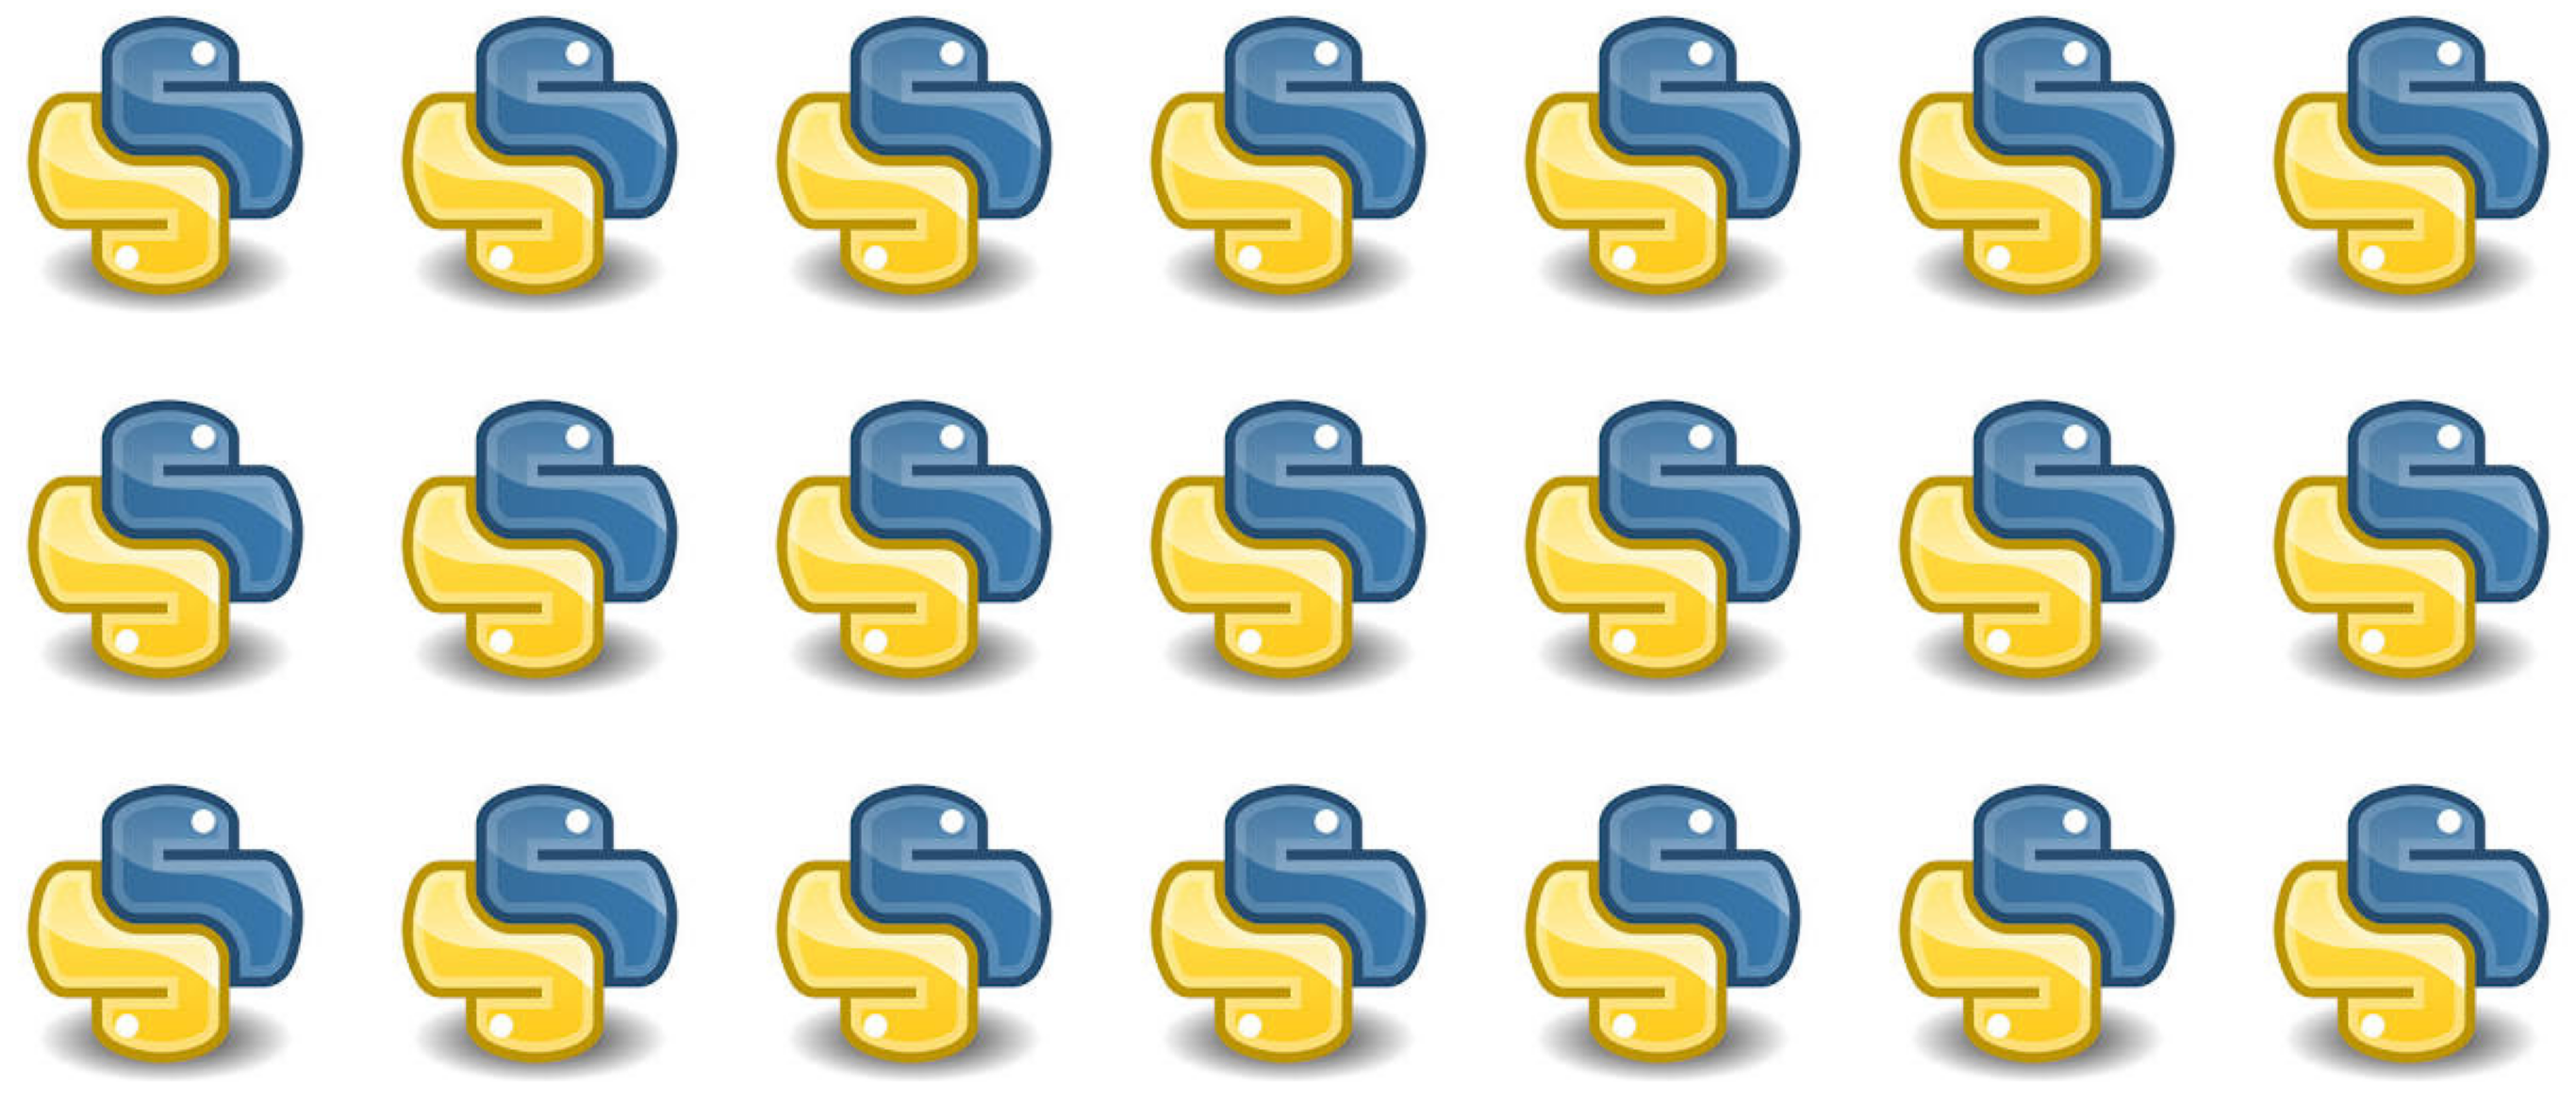

In [12]:
def grid_with_flips(image, matrix):
    
    #Define flip types
    def fliphor (matrix) :
        r = matrix.shape[0]
        k = matrix.shape[1]
        matrix_fliphor = np.zeros(shape = (r,k,3), dtype=np.int32)
        for i in range(r) :
            for j in range(k) :
                matrix_fliphor[i,j] = matrix[i,(r-1-j)%r]        
        return matrix_fliphor
 
    def flipver (matrix) :
        r = matrix.shape[0]
        k = matrix.shape[1]
        matrix_flipver = np.zeros(shape = (r,k,3), dtype=np.int32)
        for i in range(r) :
            for j in range(k) :
                matrix_flipver[i,j] = matrix[(k-1-i)%k,j]  
        return matrix_flipver
     
    def fliphorver (matrix) :
        r = matrix.shape[0]
        k = matrix.shape[1]
        matrix_fliphorver = np.zeros(shape = (r,k,3), dtype=np.int32)
        matrix_fliphorver = flipver(fliphor(matrix))
        return matrix_fliphorver
    
   #Calculate number of rows and columns
    num_rows = len(matrix)
    num_cols = len(matrix[0]) 
    
    #Create empty matrix
    flipped_images = []
    
    
    for row in range(num_rows):
        for col in range(num_cols):
            #Coördinates of each flip type
            flip_type = matrix[row][col]
            
            
            #Assign flip types
            if flip_type == 0:
                flipped_image = image
            elif flip_type == 1:
                flipped_image = fliphor(image)
            elif flip_type == 2:
                flipped_image = flipver(image)
            elif flip_type == 3:
                flipped_image = fliphorver(image)
            
            #Append all images
            flipped_images.append(flipped_image)
            
    # Create subplots to display each flipped image
    num_images = len(flipped_images)
    rows = int(np.ceil(num_images / num_cols))
    fig, axes = plt.subplots(rows, num_cols, figsize=(5*num_cols, 5*rows))
    
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(flipped_images[i])
            ax.set_axis_off()
        else:
            ax.axis('off')
    
    #Show new image
    plt.show(flipped_images)
    
grid_with_flips(im_pylogo,  [[1 for i in range(7)] for i in range(3)])   

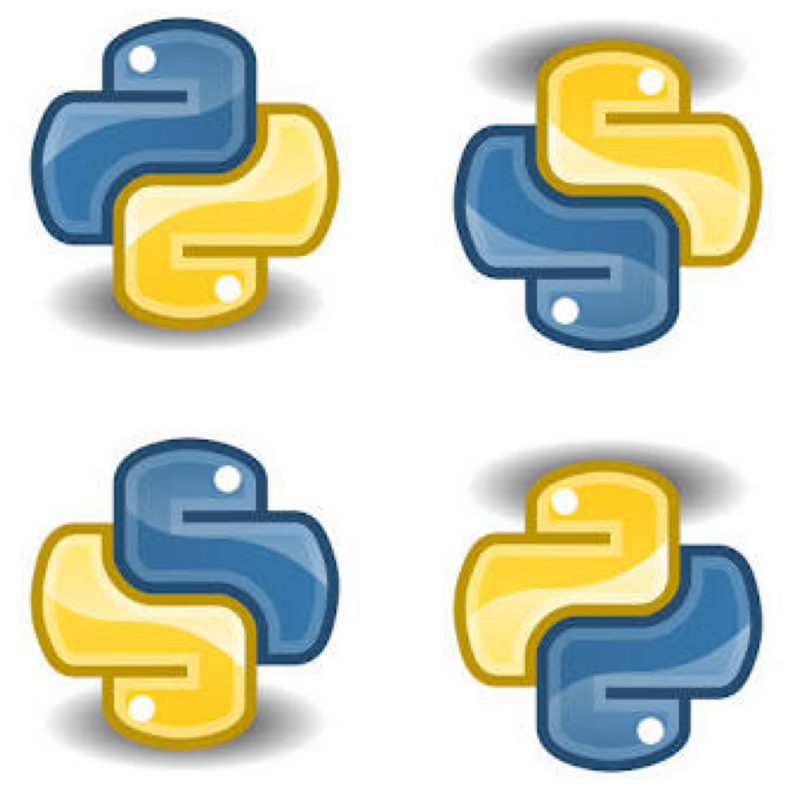

In [15]:
def grid_with_flips(image, matrix):
    
   #Calculate number of rows and columns
    num_rows = len(matrix)
    num_cols = len(matrix[0]) 
    
    #Create empty matrix
    flipped_images = []
    

    for row in range(num_rows):
        for col in range(num_cols):
            #Coördinates of each flip type
            flip_type = matrix[row][col]
            
             #Assign flip types
            if flip_type == 0:
                flipped_image = image
            elif flip_type == 1:
                flipped_image = np.flipud(image)
            elif flip_type == 2:
                flipped_image = np.fliplr(image)
            elif flip_type == 3:
                flipped_image = np.flipud(np.fliplr(image))
            
            #Append all images
            flipped_images.append(flipped_image)
            
    # Create subplots to display each flipped image
    num_images = len(flipped_images)
    rows = int(np.ceil(num_images / num_cols))
    fig, axes = plt.subplots(rows, num_cols, figsize=(5*num_cols, 5*rows))
    
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(flipped_images[i])
            ax.set_axis_off()
        else:
            ax.axis('off')
    
    #Show new image
    plt.show(flipped_images)
    
grid_with_flips(im_pylogo,  [[0, 1], [2, 3]])  